In [1]:
## Description: Below is an implementation of 2D system delineating
## Fitzhugh neuron dynamics as a classical example of a stiff ivp. 
## This document is part of the course material for AMATH581
## Scientific Computing. Autumn 2022.

In [2]:
def sys_rhs(t, y, a, b, c, I):
  v, w = y
  dydt = [- v ** 3 + (1 + a) * (v ** 2) - a * v - w + I,
          b * v - c * w]
  return  dydt

In [3]:
## Solution with RK45
from scipy.integrate import solve_ivp

tspan = [0, 400]

yt0 = [.2, 0.]

a = .03; b = .01; c = .01; I = .1

sol = solve_ivp(sys_rhs, tspan, y0 = yt0, args=(a, b, c, I))

print('dt_rk45 =', tspan[1]/len(sol.t))

dt_rk45 = 3.225806451612903


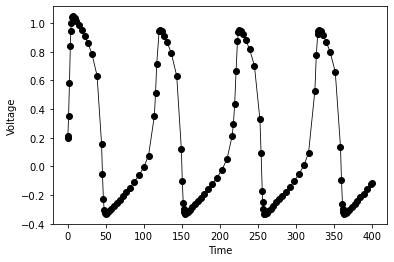

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(sol.t, sol.y[0,:], 'ko-', linewidth=.8)
plt.ylabel('Voltage'); plt.xlabel('Time')
plt.show()

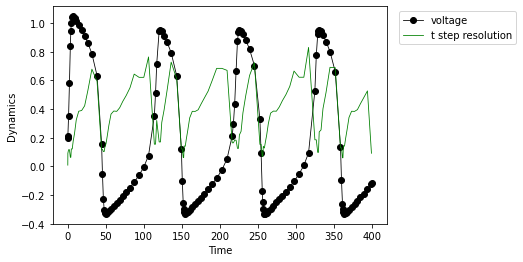

In [5]:
plt.plot(sol.t, sol.y[0,:], 'ko-', linewidth=.8)
plt.plot(sol.t[:-1], np.diff(sol.t)/10, 'g-', linewidth=.8)
plt.ylabel('Dynamics'); plt.xlabel('Time')
plt.legend(['voltage','t step resolution'],bbox_to_anchor=(1.4, 1.))
plt.show()

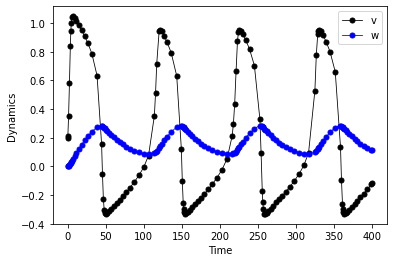

In [6]:
plt.plot(sol.t, sol.y[0,:], 'ko-', linewidth=.8, markersize=5)
plt.plot(sol.t, sol.y[1,:], 'bo-', linewidth=.8, markersize=5)
plt.legend(['v','w'])
plt.ylabel('Dynamics'); plt.xlabel('Time')
plt.show()

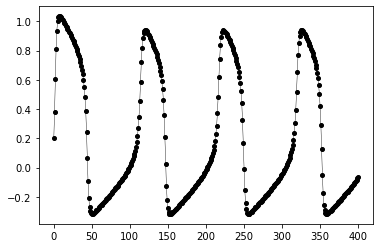

In [7]:
## Solution with an implicit scheme (Backward Euler)
## In Backward Euler, we have to solve the following implicit
## equation, (y(tn + h) - y(tn))/ h = F(y(tn+h), tn+h)
from scipy.optimize import fsolve

def backward_Euler(t, f, yt0):
  dt = t[1] - t[0]

  y = np.zeros((len(t),2))
  y[0,:] = yt0
  for k in range(len(y) - 1):
    eqn = lambda z: z - y[k,:] - np.multiply(dt, f(t[k]+dt,z,a,b,c,I))
    y[k+1,:] = fsolve(eqn, y[k,:])
  return y

tspan_BE = np.arange(0, 400+1, 1)
ysolBE = backward_Euler(tspan_BE, sys_rhs, yt0)

plt.plot(tspan_BE, ysolBE[:,0], 'ko-', linewidth=.4, markersize=4)
plt.show()

In [8]:
ratio = len(sol.t) / len(tspan_BE)
print('ratio =', ratio)

ratio = 0.3092269326683292


dt_stiff_solver = 3.225806451612903
ratio is:  0.42758620689655175


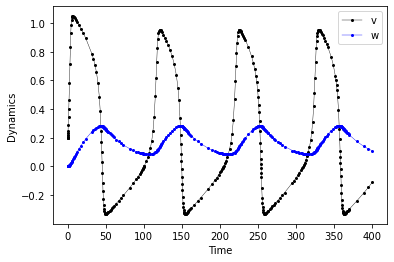

In [9]:
## Solution with a stiff ODE solver
solstiff = solve_ivp(sys_rhs, tspan, y0 = yt0, args=(a, b, c, I), method='BDF')

print('dt_stiff_solver =', tspan[1]/len(sol.t))

ratio = len(sol.t) / len(solstiff.t)
print('ratio is: ', ratio)

plt.plot(solstiff.t, solstiff.y[0,:], 'ko-', linewidth=.4, markersize=2.)
plt.plot(solstiff.t, solstiff.y[1,:], 'bo-', linewidth=.4, markersize=2.)
plt.legend(['v','w'])
plt.ylabel('Dynamics'); plt.xlabel('Time')
plt.show()

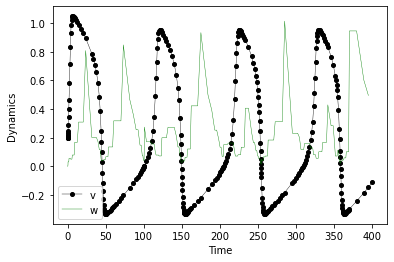

In [10]:
plt.plot(solstiff.t, solstiff.y[0,:], 'ko-', linewidth=.4, markersize=4.)
plt.plot(solstiff.t[:-1], np.diff(solstiff.t)/10, 'g-', linewidth=.4)
plt.legend(['v','w']); plt.ylabel('Dynamics'); plt.xlabel('Time')
plt.show()